### Today:
* Instance-based learning
    * Intro
* k-Nearest neighbours
    * Intro
    * Weighted k-NN
    * k-D tree
* Locally-Weighted Regression
    * Model

### Resources:
* k-NN: http://poincare.matf.bg.ac.rs/~janicic//courses/vi0.pdf
* k-D tree: https://www.cise.ufl.edu/class/cot5520fa09/CG_RangeKDtrees.pdf
* LOWESS: http://cs229.stanford.edu/notes/cs229-notes1.pdf
* Numpy Axis: https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png

# k-Nearest neighbours

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets("../../data/05_kNN/MNIST_data/", one_hot=True)

Extracting ../../data/05_kNN/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/05_kNN/MNIST_data/t10k-labels-idx1-ubyte.gz


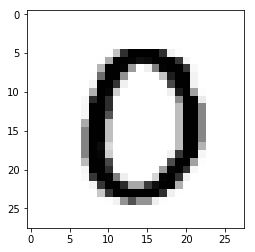

In [3]:
image = mnist.train.images[10].reshape((28, 28))
plt.imshow(image, cmap='Greys')

In [4]:
# Define paramaters for the model
n_features = 784
K = 3

In [5]:
# Training dataset
x_data, y_data = mnist.train.next_batch(5000)

# Test dataset
x_test, y_test = mnist.test.next_batch(200)

In [6]:
# Input train vector
X1 = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name="X1")

# Input test vector
X2 = tf.placeholder(dtype=tf.float32, shape=[n_features], name="X2")

In [7]:
# Calculate L1 norm
# distance = tf.reduce_sum(tf.abs(tf.subtract(X1, X2)), axis=1)

# Calculate L2 norm
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(X1, X2)), axis=1)) 

In [8]:
# Indeces of k nearest neighbours
_, indices = tf.nn.top_k(tf.negative(distance), K)

# Get labels of k nearest neigbours
k_nn_labels = tf.gather(y_data, indices)

# Labels are as one-hot vector, so sum them to find 
# one with the most votes and find its position 0-9
predict = tf.argmax(tf.reduce_sum(k_nn_labels, axis=0), axis=0)

In [9]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    accuracy = 0.0
    
    # Loop over test data
    for i in range(len(x_test)):
        
        # Predicted label
        pred_y = sess.run(predict, feed_dict={X1: x_data, X2: x_test[i]})
        
        # True label
        true_y = tf.argmax(y_test[i], axis=0).eval()
        
        match = pred_y == true_y
        
        # Print result of classification
        print("[Test %3d] Prediction: %d, True Class: %d, Match: %d" % (i, pred_y, true_y, match))
        
        # Calculate accuracy
        if match:
            accuracy += 1.0 / len(x_test)

    print("Accuracy: ", accuracy)

[Test   0] Prediction: 3, True Class: 3, Match: 1
[Test   1] Prediction: 1, True Class: 1, Match: 1
[Test   2] Prediction: 0, True Class: 0, Match: 1
[Test   3] Prediction: 4, True Class: 4, Match: 1
[Test   4] Prediction: 8, True Class: 8, Match: 1
[Test   5] Prediction: 3, True Class: 3, Match: 1
[Test   6] Prediction: 7, True Class: 7, Match: 1
[Test   7] Prediction: 1, True Class: 1, Match: 1
[Test   8] Prediction: 7, True Class: 7, Match: 1
[Test   9] Prediction: 3, True Class: 3, Match: 1
[Test  10] Prediction: 5, True Class: 5, Match: 1
[Test  11] Prediction: 0, True Class: 2, Match: 0
[Test  12] Prediction: 7, True Class: 7, Match: 1
[Test  13] Prediction: 9, True Class: 9, Match: 1
[Test  14] Prediction: 4, True Class: 4, Match: 1
[Test  15] Prediction: 3, True Class: 3, Match: 1
[Test  16] Prediction: 8, True Class: 8, Match: 1
[Test  17] Prediction: 5, True Class: 5, Match: 1
[Test  18] Prediction: 5, True Class: 5, Match: 1
[Test  19] Prediction: 3, True Class: 3, Match: 1


[Test 169] Prediction: 1, True Class: 1, Match: 1
[Test 170] Prediction: 6, True Class: 6, Match: 1
[Test 171] Prediction: 1, True Class: 1, Match: 1
[Test 172] Prediction: 6, True Class: 6, Match: 1
[Test 173] Prediction: 4, True Class: 4, Match: 1
[Test 174] Prediction: 9, True Class: 9, Match: 1
[Test 175] Prediction: 8, True Class: 8, Match: 1
[Test 176] Prediction: 4, True Class: 4, Match: 1
[Test 177] Prediction: 8, True Class: 8, Match: 1
[Test 178] Prediction: 6, True Class: 6, Match: 1
[Test 179] Prediction: 8, True Class: 8, Match: 1
[Test 180] Prediction: 6, True Class: 6, Match: 1
[Test 181] Prediction: 0, True Class: 0, Match: 1
[Test 182] Prediction: 7, True Class: 7, Match: 1
[Test 183] Prediction: 9, True Class: 9, Match: 1
[Test 184] Prediction: 0, True Class: 0, Match: 1
[Test 185] Prediction: 7, True Class: 7, Match: 1
[Test 186] Prediction: 9, True Class: 9, Match: 1
[Test 187] Prediction: 4, True Class: 4, Match: 1
[Test 188] Prediction: 0, True Class: 0, Match: 1
